## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [55]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [56]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [57]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [58]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [59]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [60]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [61]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [62]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [63]:

# view the structure of the model
model.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_282 (Conv2D)         (None, 111, 111, 32)         864       ['input_4[0][0]']             
                                                                                                  
 batch_normalization_282 (B  (None, 111, 111, 32)         96        ['conv2d_282[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_282 (Activation  (None, 111, 111, 32)         0         ['batch_normalization_28

In [64]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [65]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [66]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [67]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [68]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\thmalli\AppData\Local\Temp\ipykernel_15112\4130870686.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
61/61 [==============================] - 98s 2s/step - loss: 1.7908 - accuracy: 0.7673 - val_loss: 0.3321 - val_accuracy: 0.8889
Epoch 2/20
61/61 [==============================] - 84s 1s/step - loss: 0.6225 - accuracy: 0.8877 - val_loss: 0.0228 - val_accuracy: 1.0000
Epoch 3/20
61/61 [==============================] - 86s 1s/step - loss: 0.6555 - accuracy: 0.8898 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 4/20
61/61 [==============================] - 81s 1s/step - loss: 0.7088 - accuracy: 0.9021 - val_loss: 0.0571 - val_accuracy: 0.9444
Epoch 5/20
61/61 [==============================] - 84s 1s/step - loss: 0.5696 - accuracy: 0.9216 - val_loss: 0.7268 - val_accuracy: 0.8889
Epoch 6/20
61/61 [==============================] - 83s 1s/step - loss: 0.4655 - accuracy: 0.9288 - val_loss: 0.1017 - val_accuracy: 0.9444
Epoch 7/20
61/61 [==============================] - 84s 1s/step - loss: 0.4499 - accuracy: 0.9436 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 8/20
61/61 [==

In [69]:
import matplotlib.pyplot as plt

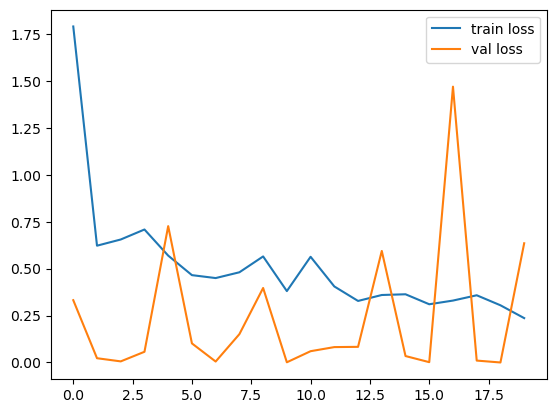

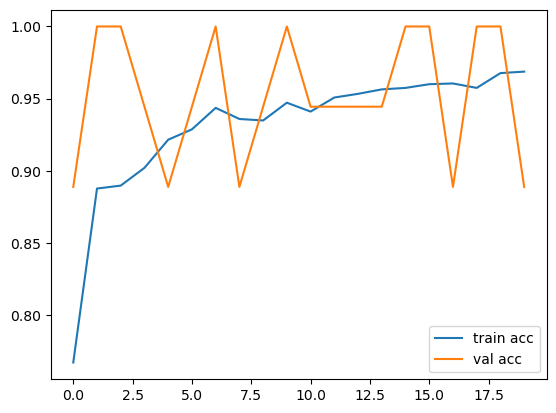

<Figure size 640x480 with 0 Axes>

In [70]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [71]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

c:\Users\thmalli\AppData\Local\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [72]:

y_pred = model.predict(test_set)


1/1 [==============================] - 6s 6s/step


In [73]:
y_pred

array([[1.0000000e+00, 5.5231524e-25, 1.2144431e-24, 0.0000000e+00],
       [7.8935435e-20, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [2.4606828e-18, 2.2832900e-01, 9.6030760e-11, 7.7167094e-01],
       [9.9999821e-01, 1.7388045e-06, 1.9201739e-20, 7.3089074e-19],
       [3.3589536e-27, 1.8464446e-23, 2.2892481e-24, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 1.1687046e-21, 7.7955494e-33],
       [2.0373484e-11, 9.8204345e-01, 5.0481237e-03, 1.2908439e-02],
       [0.0000000e+00, 8.8809030e-03, 9.2291385e-35, 9.9111909e-01],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 2.4883157e-37],
       [0.0000000e+00, 1.0000000e+00, 2.7997165e-30, 9.5733418e-25],
       [8.2673507e-19, 4.5180894e-11, 1.0000000e+00, 1.0854927e-17],
       [1.0897800e-22, 1.0000000e+00, 8.5990460e-19, 5.1063293e-13],
       [2.4477740e-09, 9.9890769e-01, 1.8210522e-12, 1.0923139e-03],
       [3.8384684e-23, 6.9805176e-11, 1.0000000e+00, 3.6898018e-37],
       [1.7595124e-15, 5.9633361e-

In [74]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [75]:
y_pred

array([0, 2, 3, 0, 3, 0, 1, 3, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1], dtype=int64)

In [76]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [79]:
model=load_model('model_resnet50.h5')